In [103]:
#Project description 
#Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances and it's calculated based on certain input features such as age,bmi,no of dependents,smoker,region etc.
#Based on certain data provided, insurance is to be predicted using machine learning

#Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [4]:
#Read and study the provided dataset

#Create Dataframe object

df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
#Explore the dataset

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
print("The dimension of the dataset:",df.shape)
print(f"\nThe column headers in the dataset: {df.columns}")

The dimension of the dataset: (1338, 7)

The column headers in the dataset: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


* It was observed that the dataset contains 1338 rows and 7 columns out of which one is the variable / feature of interest (charges)

In [10]:
#Check the description of the dataset and proceed with exploratory data analysis

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

* It could be observed that the dataset contains 3 different types of data (float64, object and int64)

In [12]:
#Check the null (missing) values in the dataset

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There was no null value in the dataset

In [13]:
#Brief about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

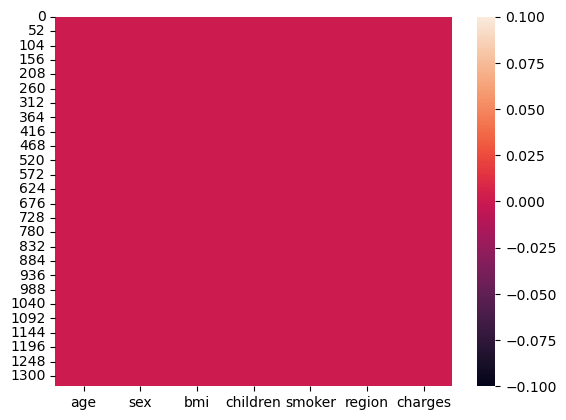

In [14]:
#Visualization with heatmap

sns.heatmap(df.isnull())

In [15]:
#Check the number of unique values in the dataset

df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [16]:
#This value should be checked per column as follows in order to see the value count per column

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29

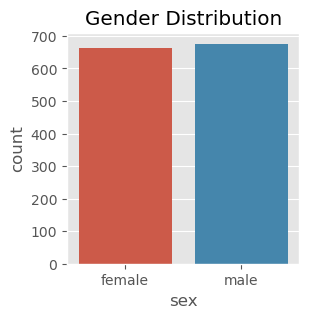

In [28]:
#Exploratory Data Analysis

plt.figure(figsize=(3,3))
style.use('ggplot')
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

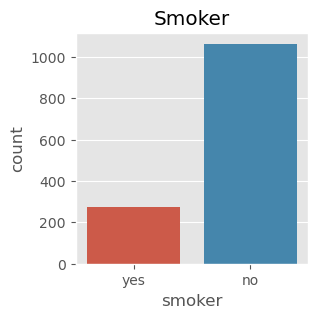

In [30]:
plt.figure(figsize=(3,3))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

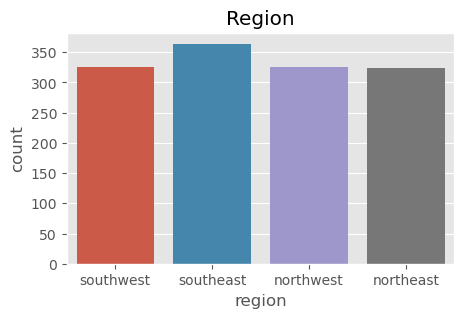

In [35]:
plt.figure(figsize=(5,3))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

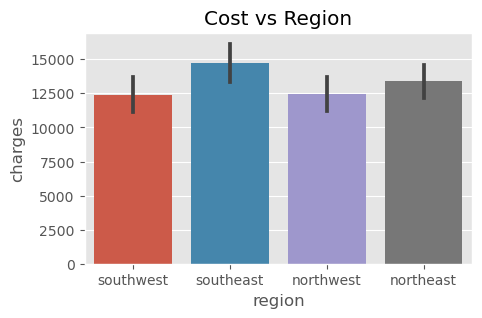

In [37]:
plt.figure(figsize=(5,3))
sns.barplot(x='region', y='charges', data=df)
plt.title('Cost vs Region')

Text(0.5, 1.0, 'Charges for smokers')

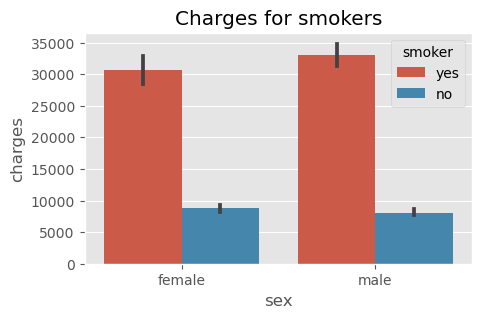

In [39]:
plt.figure(figsize=(5,3))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

<Axes: xlabel='region', ylabel='charges'>

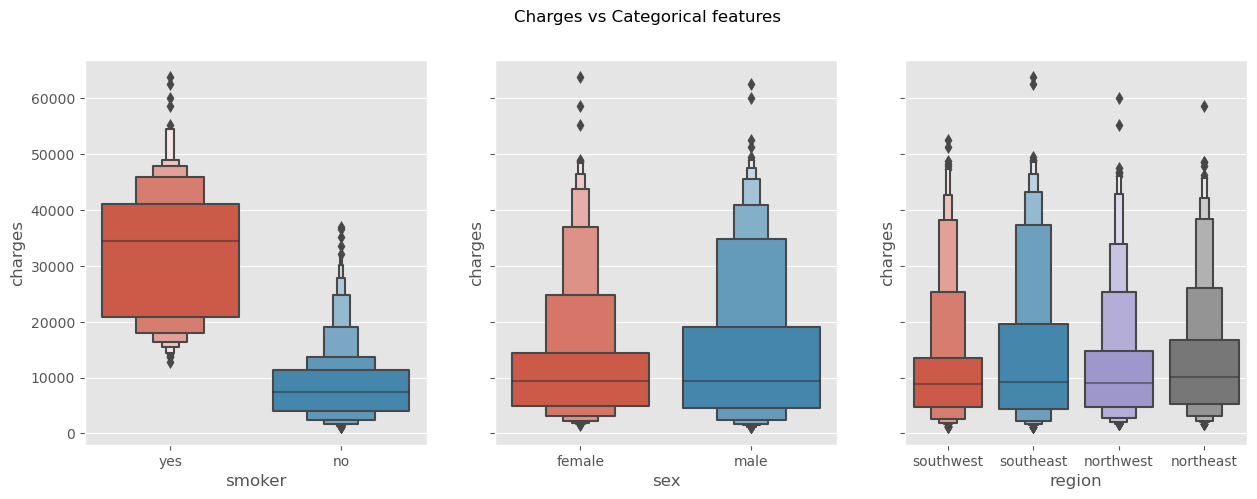

In [41]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Charges vs Categorical features')
sns.boxenplot(x='smoker', y= 'charges', data=df, ax=axes[0])
sns.boxenplot(x='sex', y= 'charges', data=df, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=df, ax=axes[2])

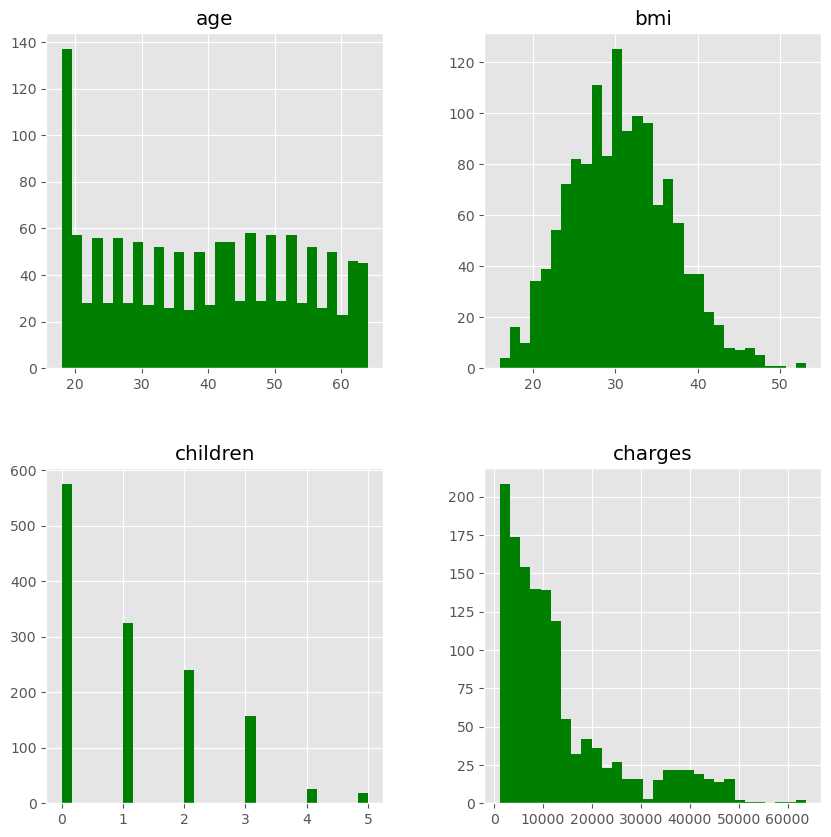

In [48]:
df[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='green')
plt.show()

* Check correlation among the features

In [49]:
#Convert categorical features to numerical and check new head

df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [50]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


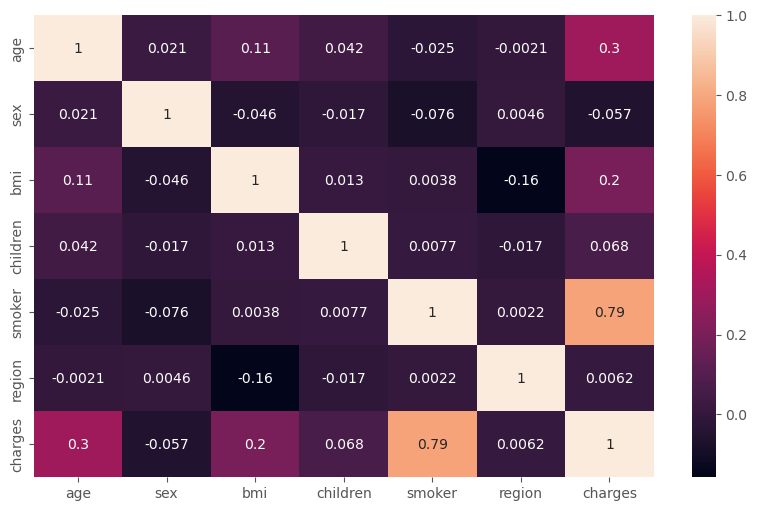

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

It could be observed that Age, BMI and Smoker are the most important features that determine charges in terms of correlation while sex, children and region do not affect charges and should be dropped in order not to affect model accuracy 

In [64]:
print(df['sex'].value_counts().sort_values()) 
print(df['children'].value_counts().sort_values())
print(df['region'].value_counts().sort_values())

sex
1    662
0    676
Name: count, dtype: int64
children
5     18
4     25
3    157
2    240
1    324
0    574
Name: count, dtype: int64
region
4    324
1    325
3    325
2    364
Name: count, dtype: int64


* Further exploratory analysis now that correlation has separated the features that determine charges

<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

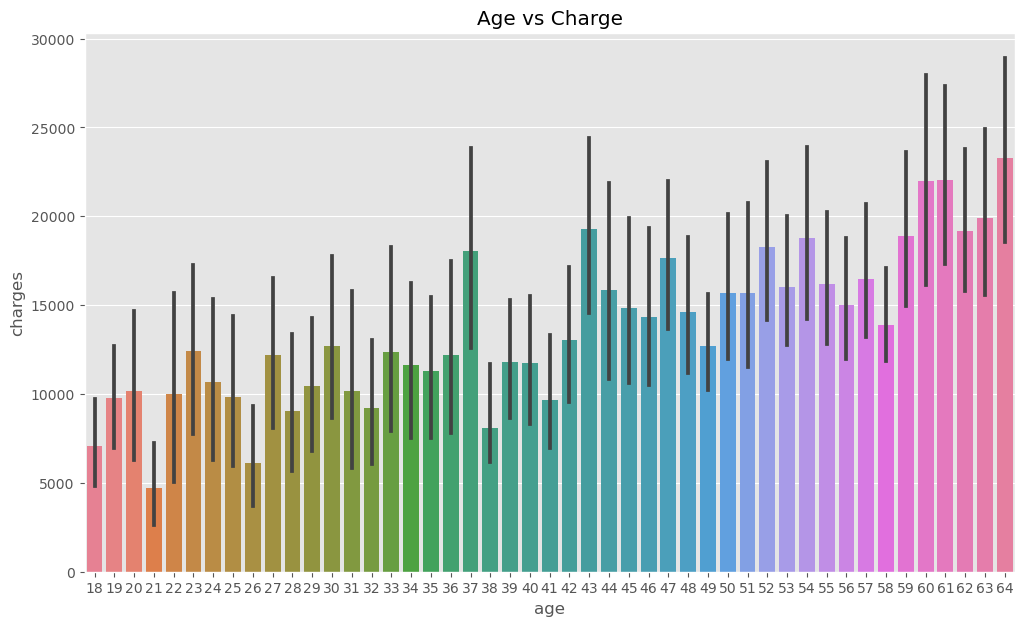

In [73]:
plt.figure(figsize=(12,7))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df,palette='husl')

<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

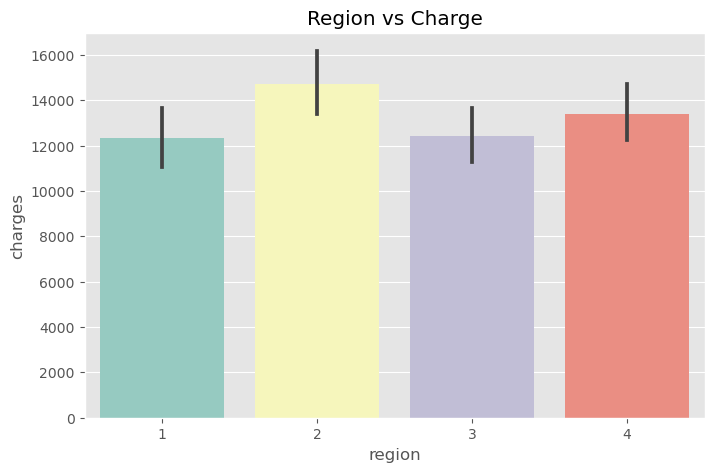

In [77]:
plt.figure(figsize=(8,5))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=df,palette='Set3')

Text(0.5, 1.0, 'BMI VS Charge')

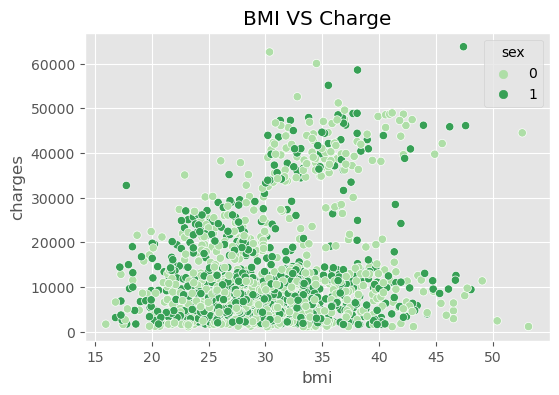

In [81]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Greens')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

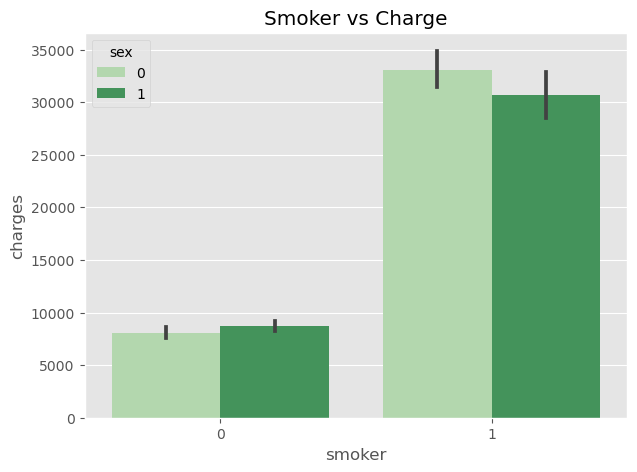

In [83]:
plt.figure(figsize=(7,5))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df,palette='Greens',hue='sex')

<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

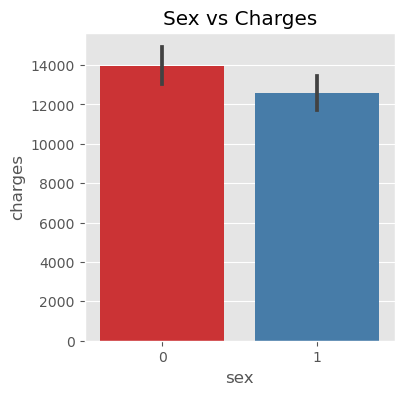

In [86]:
plt.figure(figsize=(4,4))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=df,palette='Set1')

<Axes: title={'center': 'Children vs Charges'}, xlabel='children', ylabel='charges'>

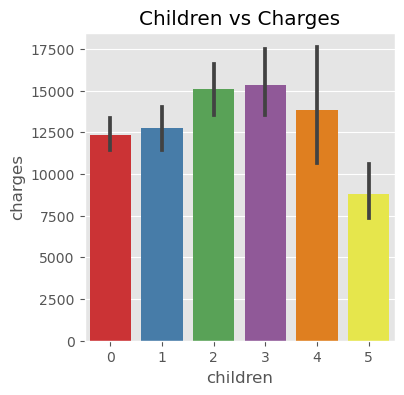

In [87]:
plt.figure(figsize=(4,4))
plt.title('Children vs Charges')
sns.barplot(x='children',y='charges',data=df,palette='Set1')

In [88]:
#Check for Skewness and Kurtosis

print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(df.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,df[col].skew(),df[col].kurt()))

Printing Skewness and Kurtosis for all columns

age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness 0.021 and  Kurtosis -2.003
bmi : Skewness 0.284 and  Kurtosis -0.051
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness 1.465 and  Kurtosis 0.146
region : Skewness 0.038 and  Kurtosis -1.328
charges : Skewness 1.516 and  Kurtosis 1.606


Text(0, 0.5, 'Count')

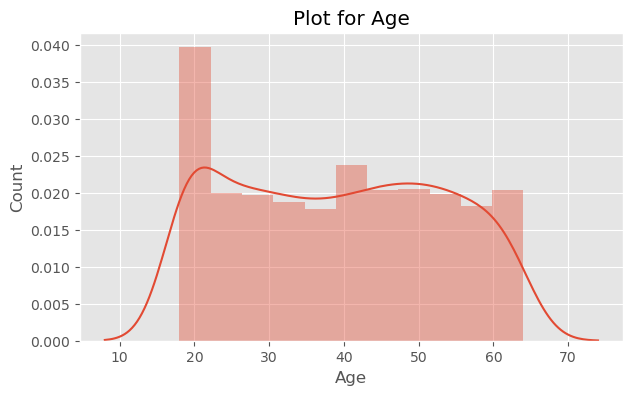

In [95]:
plt.figure(figsize=(7,4))
sns.distplot(df['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

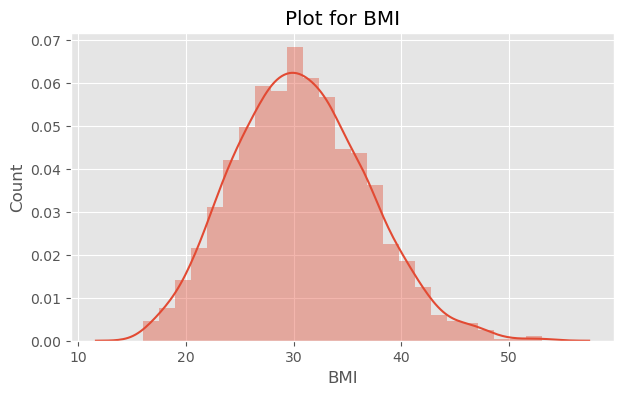

In [94]:
plt.figure(figsize=(7,4))
sns.distplot(df['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

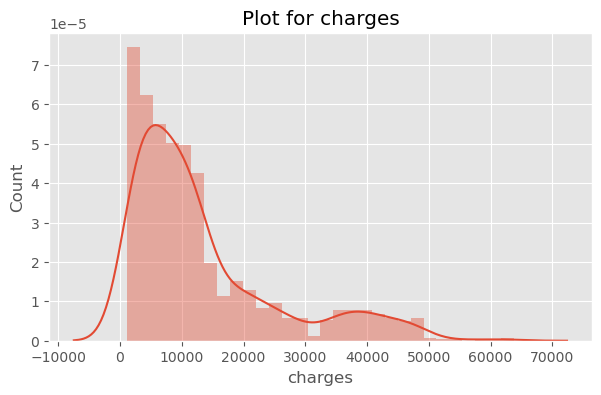

In [96]:
plt.figure(figsize=(7,4))
sns.distplot(df['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

* Scale BMI and Charges columns and go ahead with prediction

In [98]:
data_pred = df.copy()

tempBmi = data_pred.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pred['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pred.age
tempAge = tempAge.values.reshape(-1,1)
data_pred['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pred.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pred['charges'] = StandardScaler().fit_transform(tempCharges)

data_pred.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,1,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,3,0.719843
4,-0.513149,0,-0.292556,0,0,3,-0.776802


* Model Training: Split the dataset into training and testing sets

In [99]:
x = df.drop(['charges', 'sex'], axis=1)
y = df.charges

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (936, 5)
x_test shape:  (402, 5)
y_train shpae:  (936,)
y_test shape:  (402,)


* Linear Regression

In [101]:
linreg = LinearRegression()

In [102]:
linreg.fit(x_train, y_train)
pred = linreg.predict(x_test)

In [104]:
#Print R2 score and plot the scattergram

print("R2 score: ",(r2_score(y_test, pred)))

R2 score:  0.7697211527941854


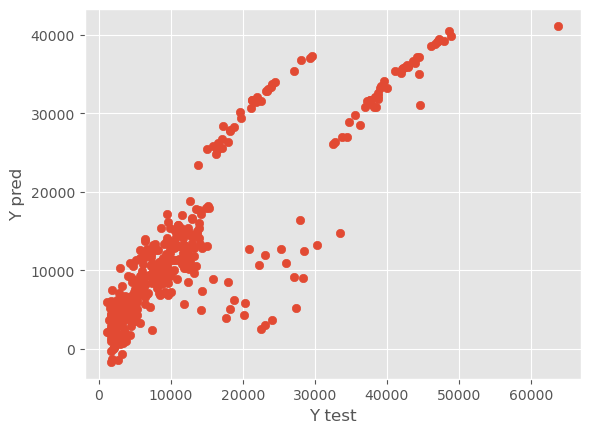

In [105]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [106]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [108]:
ins_cost_pred = linreg.predict(cust_df)
print("The medical cost personal insurance of the new customer is: ", ins_cost_pred)

The medical cost personal insurance of the new customer is:  [33206.92756082]


**** xx xx xx ****** xx xx xx ******